# eFEL Metric

In [1]:
import pandas as pd
import numpy as np

In [2]:
from brian2 import *
prefs.codegen.target = 'cython'  # weave is not multiprocess-safe!


In [3]:
import matplotlib.pyplot as plt
import efel

### Load Input and Output

In [4]:
df_inp_traces = pd.read_csv('input_traces_hh.csv')
df_out_traces = pd.read_csv('output_traces_hh.csv')

In [5]:
out_traces0 = df_out_traces.to_numpy()
out_traces0 = out_traces0[:, 1:]
# out_traces0

In [6]:
inp_traces0 = df_inp_traces.to_numpy()
inp_traces0 = inp_traces0[:4, 1:]
# inp_traces0

## Generate the Data

In [7]:
# Parameters
area = 20000*umetre**2
Cm = 1*ufarad*cm**-2 * area
El = -65*mV
EK = -90*mV
ENa = 50*mV
VT = -63*mV
params_correct = {'gl': float(10e-5*siemens*cm**-2 * area),
                  'g_na': float(400*msiemens*cm**-2 * area),
                  'g_kd': float(85*msiemens*cm**-2 * area)}

dt = 0.01*ms

In [8]:
# Generate a step-current input and an "experimental" voltage trace
input_current0 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA*10
input_current1 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA*2
input_current2 = np.hstack([np.ones(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA*2
input_current3 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA*50
input_current4 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA*0.2

input_current = np.stack((input_current0, input_current1, input_current2, input_current3, input_current4))

In [9]:
defaultclock.dt = dt

In [10]:
# The model
eqsHH = Equations('''
dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I(t))/Cm : volt
dm/dt = 0.32*(mV**-1)*(13.*mV-v+ VT)/
    (exp((13.*mV-v+VT)/(4.*mV))-1.)/ms*(1-m)-0.28*(mV**-1)*(v-VT-40.*mV)/
    (exp((v-VT-40.*mV)/(5.*mV))-1.)/ms*m : 1
dn/dt = 0.032*(mV**-1)*(15.*mV-v+VT)/
    (exp((15.*mV-v+VT)/(5.*mV))-1.)/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
g_na : siemens (constant)
g_kd : siemens (constant)
gl   : siemens (constant)
''')

In [11]:
I = TimedArray(input_current0, dt=dt)

G = NeuronGroup(1, eqsHH, method='exponential_euler')
G.v = El
G.set_states(params_correct, units=False)
mon = StateMonitor(G, 'v', record=0)
run(20*ms)

voltage = mon.v[0]/mV
voltage += np.random.randn(len(voltage))


inp_trace0 = np.array([input_current0])
n0, n1 = inp_trace0.shape

out_trace0 = np.array(voltage[:n1])

In [12]:
start_scope()
I = TimedArray(input_current1, dt=dt)
G = NeuronGroup(1, eqsHH, method='exponential_euler')
G.v = El
G.set_states(params_correct, units=False)
mon = StateMonitor(G, 'v', record=0)

run(20*ms)

voltage = mon.v[0]/mV

voltage += np.random.randn(len(voltage))
inp_trace1 = np.array([input_current1])
n0, n1 = inp_trace1.shape
out_trace1 = np.array(voltage[:n1])

In [13]:
start_scope()
I = TimedArray(input_current2, dt=dt)
G = NeuronGroup(1, eqsHH, method='exponential_euler')
G.v = El
G.set_states(params_correct, units=False)
mon = StateMonitor(G, 'v', record=0)

run(20*ms)

voltage = mon.v[0]/mV

voltage += np.random.randn(len(voltage))
inp_trace2 = np.array([input_current2])
n0, n1 = inp_trace2.shape
out_trace2 = np.array(voltage[:n1])

In [14]:
start_scope()
I = TimedArray(input_current3, dt=dt)
G = NeuronGroup(1, eqsHH, method='exponential_euler')
G.v = El
G.set_states(params_correct, units=False)
mon = StateMonitor(G, 'v', record=0)

run(30*ms)

voltage = mon.v[0]/mV

voltage += np.random.randn(len(voltage))
inp_trace3 = np.array([input_current3])
n0, n1 = inp_trace3.shape
out_trace3 = np.array(voltage[:n1])

In [15]:
start_scope()
I = TimedArray(input_current4, dt=dt)
G = NeuronGroup(1, eqsHH, method='exponential_euler')
G.v = El
G.set_states(params_correct, units=False)
mon = StateMonitor(G, 'v', record=0)

run(30*ms)

voltage = mon.v[0]/mV

voltage += np.random.randn(len(voltage))
inp_trace4 = np.array([input_current4])
n0, n1 = inp_trace4.shape
out_trace4 = np.array(voltage[:n1])

In [16]:
inp_traces = np.stack((inp_trace0[0], inp_trace1[0], inp_trace2[0], inp_trace3[0], inp_trace4[0]))
# inp_traces = np.stack((inp_trace0[0], inp_trace1[0], inp_trace2[0], inp_trace3[0]))

In [17]:
out_traces = np.stack((out_trace0, out_trace1, out_trace2, out_trace3,out_trace4))
# out_traces = np.stack((out_trace0, out_trace1, out_trace2, out_trace3))

## Visualize all the Traces

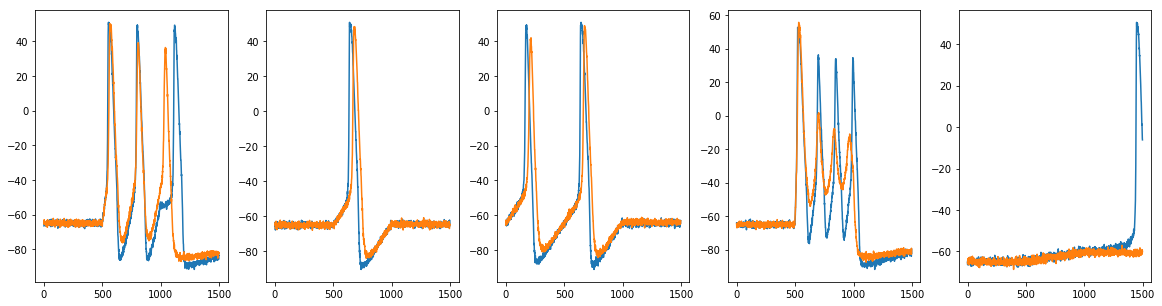

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,5))
ax[0].plot(out_traces[0])
ax[1].plot(out_traces[1])
ax[2].plot(out_traces[2])
ax[3].plot(out_traces[3])
ax[4].plot(out_traces[4])

ax[0].plot(out_traces0[0])
ax[1].plot(out_traces0[1])
ax[2].plot(out_traces0[2])
ax[3].plot(out_traces0[3]);
ax[4].plot(out_traces0[4]);


## Setup Env for Metric

In [19]:
# inp_traces = np.stack((inp_trace0[0], inp_trace1[0], inp_trace2[0], inp_trace3[0], inp_trace4[0]))
inp_traces = np.stack((inp_trace0[0], inp_trace1[0], inp_trace2[0], inp_trace3[0]))
np.shape(inp_traces)

(4, 1497)

In [20]:
# out_traces = np.stack((out_trace0, out_trace1, out_trace2, out_trace3,out_trace4))
out_traces = np.stack((out_trace0, out_trace1, out_trace2, out_trace3))
np.shape(out_traces)

(4, 1497)

In [21]:
out_traces0 = df_out_traces.to_numpy()
out_traces0 = out_traces0[:4, 1:]
np.shape(out_traces0)

(4, 1497)

## Setup For Metric Deev

In [22]:
def calculate_features(traces, inp_times, feat_list):
    out_traces = []
    for i, trace in enumerate(traces):
        time = np.arange(0, len(trace)/10, 0.1)
        temp_trace = {}
        temp_trace['T'] = time
        temp_trace['V'] = trace
        temp_trace['stim_start'] = [inp_times[i][0]]
        temp_trace['stim_end'] = [inp_times[i][1]]
        out_traces.append(temp_trace)

    results = efel.getFeatureValues(out_traces, feat_list)

    return results

### __init__

### COMMENTS
- add check for traces_times lenght

In [23]:
time = np.arange(0, len(out_traces[0])/10, 0.1)

In [24]:
# traces_times = [[50, 100], [50, 100], [50, 100], [50, 100], [50, 100]]
traces_times = [[50, 100], [50, 100], [50, 100], [50, 100]]
np.shape(traces_times)

(4, 2)

In [25]:
# fl = ['AP_amplitude', 'peak_time', 'peak_voltage', 'AP_begin_time', 'AP_begin_width', 
#                                                  'AP_begin_voltage', 'mean_frequency']
fl = ['mean_AP_amplitude', 'voltage_base', 'mean_frequency']


#### Calculate features of output

In [26]:
output = out_traces

In [27]:
out_feat = calculate_features(output, traces_times, fl)

In [28]:
out_feat

[{'mean_AP_amplitude': array([95.02459257]),
  'voltage_base': array([-64.83203191]),
  'mean_frequency': array([67.11409396])},
 {'mean_AP_amplitude': array([95.7619062]),
  'voltage_base': array([-65.04182446]),
  'mean_frequency': array([71.94244604])},
 {'mean_AP_amplitude': array([92.45869112]),
  'voltage_base': array([-67.4245827]),
  'mean_frequency': array([69.44444444])},
 {'mean_AP_amplitude': array([89.20098477]),
  'voltage_base': array([-64.75585042]),
  'mean_frequency': array([80.97165992])}]

In [29]:
for r in out_feat:
    for k, v in r.items():
        if v is None:
            print('None for key:{}'.format(k))
        
            r[k] = np.array([9999]) # WARNING HERE
        if (len(r[k])) > 1:
            print('you can only use features that return one value') # ERROR HERE

out_feat    

[{'mean_AP_amplitude': array([95.02459257]),
  'voltage_base': array([-64.83203191]),
  'mean_frequency': array([67.11409396])},
 {'mean_AP_amplitude': array([95.7619062]),
  'voltage_base': array([-65.04182446]),
  'mean_frequency': array([71.94244604])},
 {'mean_AP_amplitude': array([92.45869112]),
  'voltage_base': array([-67.4245827]),
  'mean_frequency': array([69.44444444])},
 {'mean_AP_amplitude': array([89.20098477]),
  'voltage_base': array([-64.75585042]),
  'mean_frequency': array([80.97165992])}]

### get_features

In [30]:
n_traces = 4

In [31]:
traces = np.vstack([out_traces0, out_traces0])
traces

array([[-63.54211145, -65.52491616, -62.90054542, ..., -81.5252667 ,
        -82.30107475, -82.04870895],
       [-63.78548155, -64.75587972, -64.60550311, ..., -64.42127691,
        -65.13069593, -64.48718384],
       [-62.92648395, -65.82540807, -64.76394825, ..., -64.9418292 ,
        -63.8704734 , -63.17105741],
       ...,
       [-63.78548155, -64.75587972, -64.60550311, ..., -64.42127691,
        -65.13069593, -64.48718384],
       [-62.92648395, -65.82540807, -64.76394825, ..., -64.9418292 ,
        -63.8704734 , -63.17105741],
       [-64.51645049, -66.84945425, -64.64260378, ..., -80.91299455,
        -79.08977935, -82.01562544]])

In [32]:
sl = int(np.shape(traces)[0]/n_traces)
# sl

2

In [33]:
feat = []
temp_traces = np.split(traces, sl)

for ii in arange(sl):
    temp_trace = temp_traces[ii]
    temp_feat = calculate_features(temp_trace, traces_times, fl)
    
    for r in temp_feat:
        for k, v in r.items():
            if v is None:
                print('None')
                r[k] = np.array([9999]) # WARNING HERE
            if (len(r[k])) > 1:
                print('you can only use features that return one value') # ERROR HERE

    feat.append(temp_feat)
    

WARNING    /home/alteska/.local/lib/python3.7/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature mean_AP_amplitude: AP_amplitude: More peak_voltage entries during the stimulus than AP_begin_indices entries
Feature [AP_amplitude] is missing
Error calculating AP_amplitude for mean_AP_amplitude
  RuntimeWarning)
 [py.warnings]


None
None


In [86]:
features

[[{'mean_AP_amplitude': array([84.09934389]),
   'voltage_base': array([-65.02022173]),
   'mean_frequency': array([65.1465798])},
  {'mean_AP_amplitude': array([85.66269442]),
   'voltage_base': array([-64.98160648]),
   'mean_frequency': array([54.94505495])},
  {'mean_AP_amplitude': array([85.78382778]),
   'voltage_base': array([-66.86791073]),
   'mean_frequency': array([57.47126437])},
  {'mean_AP_amplitude': array([9999]),
   'voltage_base': array([-64.8898122]),
   'mean_frequency': array([104.38413361])}],
 [{'mean_AP_amplitude': array([84.09934389]),
   'voltage_base': array([-65.02022173]),
   'mean_frequency': array([65.1465798])},
  {'mean_AP_amplitude': array([85.66269442]),
   'voltage_base': array([-64.98160648]),
   'mean_frequency': array([54.94505495])},
  {'mean_AP_amplitude': array([85.78382778]),
   'voltage_base': array([-66.86791073]),
   'mean_frequency': array([57.47126437])},
  {'mean_AP_amplitude': array([9999]),
   'voltage_base': array([-64.8898122]),
   '

## get_errors!

we start with out_feat and feat 

In [35]:
def combine(x, y):
    return x - y   

In [36]:
def feat_to_err(d1, d2):
    d={}
    err = 0
    for key in d1.keys():
        x = d1[key]
        y = d2[key]
        d[key] = combine(x, y)
        
    for k, v in d.items():
        err += sum(v)

    return err

In [60]:
feat


[[{'mean_AP_amplitude': array([84.09934389]),
   'voltage_base': array([-65.02022173]),
   'mean_frequency': array([65.1465798])},
  {'mean_AP_amplitude': array([85.66269442]),
   'voltage_base': array([-64.98160648]),
   'mean_frequency': array([54.94505495])},
  {'mean_AP_amplitude': array([85.78382778]),
   'voltage_base': array([-66.86791073]),
   'mean_frequency': array([57.47126437])},
  {'mean_AP_amplitude': array([9999]),
   'voltage_base': array([-64.8898122]),
   'mean_frequency': array([104.38413361])}],
 [{'mean_AP_amplitude': array([84.09934389]),
   'voltage_base': array([-65.02022173]),
   'mean_frequency': array([65.1465798])},
  {'mean_AP_amplitude': array([85.66269442]),
   'voltage_base': array([-64.98160648]),
   'mean_frequency': array([54.94505495])},
  {'mean_AP_amplitude': array([85.78382778]),
   'voltage_base': array([-66.86791073]),
   'mean_frequency': array([57.47126437])},
  {'mean_AP_amplitude': array([9999]),
   'voltage_base': array([-64.8898122]),
   '

In [65]:
features = feat
features


[[{'mean_AP_amplitude': array([84.09934389]),
   'voltage_base': array([-65.02022173]),
   'mean_frequency': array([65.1465798])},
  {'mean_AP_amplitude': array([85.66269442]),
   'voltage_base': array([-64.98160648]),
   'mean_frequency': array([54.94505495])},
  {'mean_AP_amplitude': array([85.78382778]),
   'voltage_base': array([-66.86791073]),
   'mean_frequency': array([57.47126437])},
  {'mean_AP_amplitude': array([9999]),
   'voltage_base': array([-64.8898122]),
   'mean_frequency': array([104.38413361])}],
 [{'mean_AP_amplitude': array([84.09934389]),
   'voltage_base': array([-65.02022173]),
   'mean_frequency': array([65.1465798])},
  {'mean_AP_amplitude': array([85.66269442]),
   'voltage_base': array([-64.98160648]),
   'mean_frequency': array([54.94505495])},
  {'mean_AP_amplitude': array([85.78382778]),
   'voltage_base': array([-66.86791073]),
   'mean_frequency': array([57.47126437])},
  {'mean_AP_amplitude': array([9999]),
   'voltage_base': array([-64.8898122]),
   '

In [73]:
print(out_feat)

{'mean_AP_amplitude': array([95.02459257]), 'voltage_base': array([-64.83203191]), 'mean_frequency': array([67.11409396])}


In [88]:
errors = []
for feat in features:
    temp_errors = []
    for i, F in enumerate(feat):
        temp_err = feat_to_err(F, out_feat[i])
        temp_errors.append(temp_err)

    error = sum(np.abs(temp_errors))
    errors.append(error)

print(errors)


[9991.286236101203, 9991.286236101203]


## Transform Into class!

In [91]:

class FeatureMetric(object):
    def __init__(self, traces_times, feat_list, combine=None):
        self.traces_times = traces_times
        self.feat_list = feat_list

        if combine is None:
            def combine(x, y):
                return x - y
        self.combine = combine

    def get_features(self, traces, output, n_traces):
        self.out_feat = calculate_features(output, self.traces_times, self.feat_list)
        for r in self.out_feat:
            for k, v in r.items():
                if v is None:
                    print('None for key:{}'.format(k))
                    r[k] = np.array([9999]) # WARNING HERE
                if (len(r[k])) > 1:
                    print('you can only use features that return one value') # ERROR HERE


        sl = int(np.shape(traces)[0]/n_traces)
        feat = []
        temp_traces = np.split(traces, sl)

        for ii in arange(sl):
            temp_trace = temp_traces[ii]
            temp_feat = calculate_features(temp_trace, self.traces_times, self.feat_list)

            for r in temp_feat:
                for k, v in r.items():
                    if v is None:
                        print('None')
                        r[k] = np.array([9999]) # WARNING HERE
                    if (len(r[k])) > 1:
                        print('you can only use features that return one value') # ERROR HERE

            feat.append(temp_feat)

        self.features = feat

    def feat_to_err(self, d1, d2):
        d={}
        err = 0
        for key in d1.keys():
            x = d1[key]
            y = d2[key]
            d[key] = self.combine(x, y)

        for k, v in d.items():
            err += sum(v)

        return err

    def get_errors(self, features, n_traces):
        errors = []
        for feat in features:
            temp_errors = []
            for i, F in enumerate(feat):
                temp_err = self.feat_to_err(F, out_feat[i])
                temp_errors.append(temp_err)
        
            error = sum(np.abs(temp_errors))
            errors.append(error)
       
            
        self.errors = errors

In [92]:
fmetric = FeatureMetric(traces_times, fl, combine=None)

In [95]:
fmetric.get_features(traces, output, n_traces)
fmetric.get_errors(fmetric.features, n_traces)

print(fmetric.errors)

None
None
[9991.286236101203, 9991.286236101203]


In [96]:
# fmetric.calc(traces, output, n_traces)